In [1]:
#Data management libraries
import pandas as pd
import numpy as np

#Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Chart appearance
%matplotlib inline

import scipy.stats as stats

from IPython.display import Image

In [2]:
df = pd.read_csv('archive/googleplaystore.csv')
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
print(df.shape)

(10840, 13)


In [4]:
df.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [5]:
#Remove null values w/ sanity check
df = df.dropna()
print(df.shape)

#reprint for null values
df.isnull().sum()

(9360, 13)


Rating            0
App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
df.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [7]:
print(df.duplicated().sum())

474


In [8]:
df[df.duplicated(keep=False)].sort_values(by="App")

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,4.0,10 Best Foods for You,HEALTH_AND_FITNESS,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
1393,4.0,10 Best Foods for You,HEALTH_AND_FITNESS,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
2543,4.7,1800 Contacts - Lens Store,MEDICAL,23160,26M,"1,000,000+",Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
2322,4.7,1800 Contacts - Lens Store,MEDICAL,23160,26M,"1,000,000+",Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
2256,4.4,2017 EMRA Antibiotic Guide,MEDICAL,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,4.4,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,25-Jul-18,6.17.2,4.4 and up
3055,4.4,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,25-Jul-18,6.17.2,4.4 and up
3103,4.2,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,02-Aug-18,Varies with device,Varies with device
3118,4.2,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,02-Aug-18,Varies with device,Varies with device


In [9]:
df=df.drop_duplicates()

In [10]:
df[df.duplicated(subset="App", keep=False)].sort_values(by="App")

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,4.6,365Scores - Live Scores,SPORTS,666246,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up
3083,4.6,365Scores - Live Scores,SPORTS,666521,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up
3953,4.5,8 Ball Pool,SPORTS,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1970,4.5,8 Ball Pool,GAME,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1675,4.5,8 Ball Pool,GAME,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,4.1,textPlus: Free Text & Calls,SOCIAL,382120,28M,"10,000,000+",Free,0,Everyone,Social,26-Jul-18,7.3.1,4.1 and up
3055,4.4,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,25-Jul-18,6.17.2,4.4 and up
2964,4.4,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,25-Jul-18,6.17.2,4.4 and up
8291,4.2,wetter.com - Weather and Radar,WEATHER,189310,38M,"10,000,000+",Free,0,Everyone,Weather,06-Aug-18,Varies with device,Varies with device


In [11]:
df=df.drop_duplicates(subset="App")

In [12]:
df

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


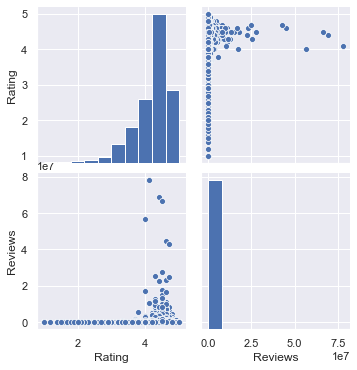

In [13]:
sns.pairplot(data=df)

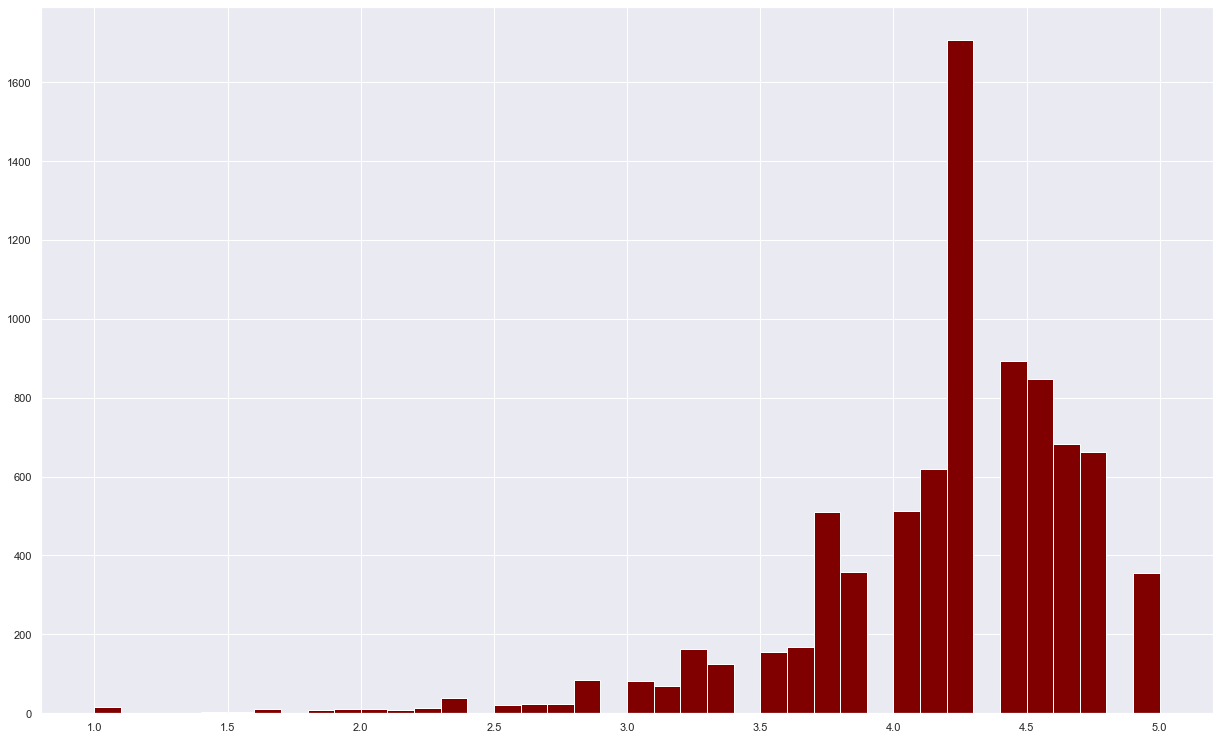

In [14]:
df.Rating.hist(bins=40, figsize=(21,13), color='maroon');

In [15]:
#cond1=df.Reviews <= 1000
#df[cond1].Reviews.hist(bins=40, figsize=(21,13), color='maroon');
sns.displot(df['Rating'])
plt.show()
print('Knew of Distribution'.df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()))

AttributeError: module 'seaborn' has no attribute 'displot'

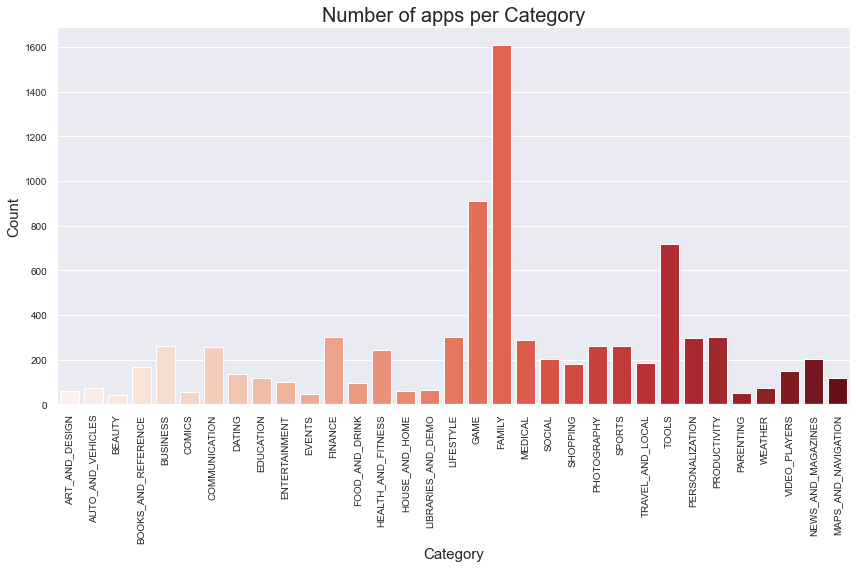

In [16]:
plt.figure(figsize=(12,8))
fig=sns.countplot(df['Category'],palette='Reds')
fig.set_xlabel("Category",size=15)
fig.set_ylabel("Count",size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Number of apps per Category',size = 20)
plt.tight_layout()

In [17]:
"""
Data Visualizataion
"""

def compute_app_types(df):
    """
    Given a dataframe, compute the number 
    of free and paid apps respectively
    """
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))  
    ax.tick_params(labelrotation=90)
    return stats

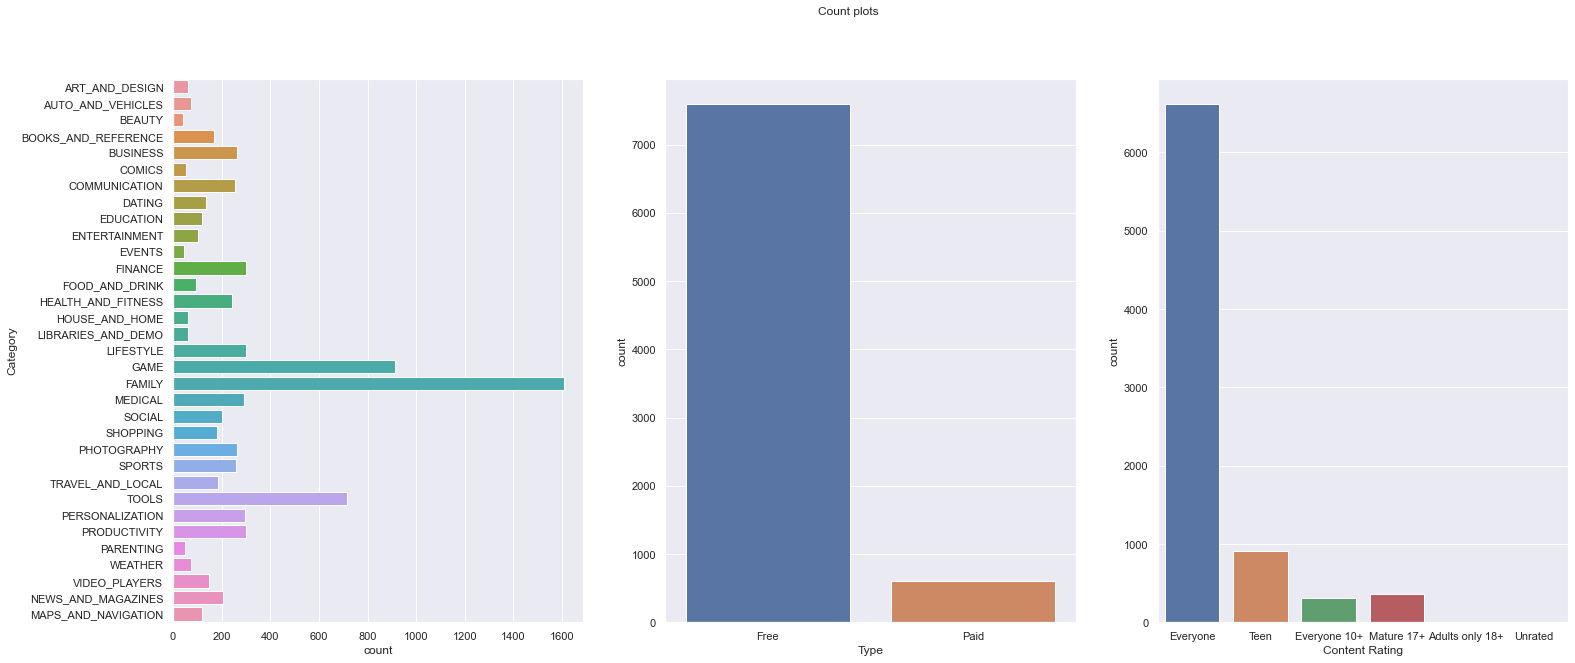

In [18]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,10))
plt.suptitle('Count plots')
sns.countplot(y='Category',data=df,ax=ax1)
sns.countplot('Type',data=df,ax=ax2)
sns.countplot('Content Rating',data=df,ax=ax3)
plt.show()

In [19]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [20]:
category_list = list(df.Category.unique())
ratings = []

for category in category_list:
    x = df[df.Category == category]
    rating_rate = x.Rating.sum()/len(x)
    ratings.append(rating_rate)
data = pd.DataFrame({'Category':category_list, 'Rating':ratings})
new_index = (data['Rating'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data


,Category,Rating
10,EVENTS,4.435556
0,ART_AND_DESIGN,4.376667
8,EDUCATION,4.364407
3,BOOKS_AND_REFERENCE,4.344970
26,PERSONALIZATION,4.331419
28,PARENTING,4.300000
2,BEAUTY,4.278571
17,GAME,4.247368
20,SOCIAL,4.247291
29,WEATHER,4.243056


In [21]:
#CONTENT RATINGS BY CATEGORY
cat_list = list(df.Category.unique())

# content rating lists
everyone = []
teen = []
everyone_10 = []
mature_17 = []
adults_only_18 = []
unrated = []

# the function that fills category's content rating counts into lists
def insert_counts(everyone, teen, everyone_10, mature_17, adults_only_18, unrated, temp):
    
    # everyone
    try:
        everyone.append(temp.groupby('Content Rating').size()['Everyone'])
    except:
        everyone.append(0)
    
    # teen
    try:
        teen.append(temp.groupby('Content Rating').size()['Teen'])
    except:
        teen.append(0)
    
    # everyone 10+
    try:
        everyone_10.append(temp.groupby('Content Rating').size()['Everyone 10+'])
    except:
        everyone_10.append(0)
        
    # mature 17+
    try:
        mature_17.append(temp.groupby('Content Rating').size()['Mature 17+'])
    except:
        mature_17.append(0)
        
    # adults only 18+
    try:
        adults_only_18.append(temp.groupby('Content Rating').size()['Adults only 18+'])
    except:
        adults_only_18.append(0)
        
    # unrated
    try:
        unrated.append(temp.groupby('Content Rating').size()['Unrated'])
    except:
        unrated.append(0)

# fill lists iteratively via function
for cat in cat_list:
    temp = df[df.Category == cat]
    insert_counts(everyone, teen, everyone_10, mature_17, adults_only_18, unrated, temp)
    

[Text(0, 0.5, 'Categories'),
 Text(0.5, 0, 'Percentage of Content Ratings'),
 Text(0.5, 1.0, 'Categories by Content Ratings ')]

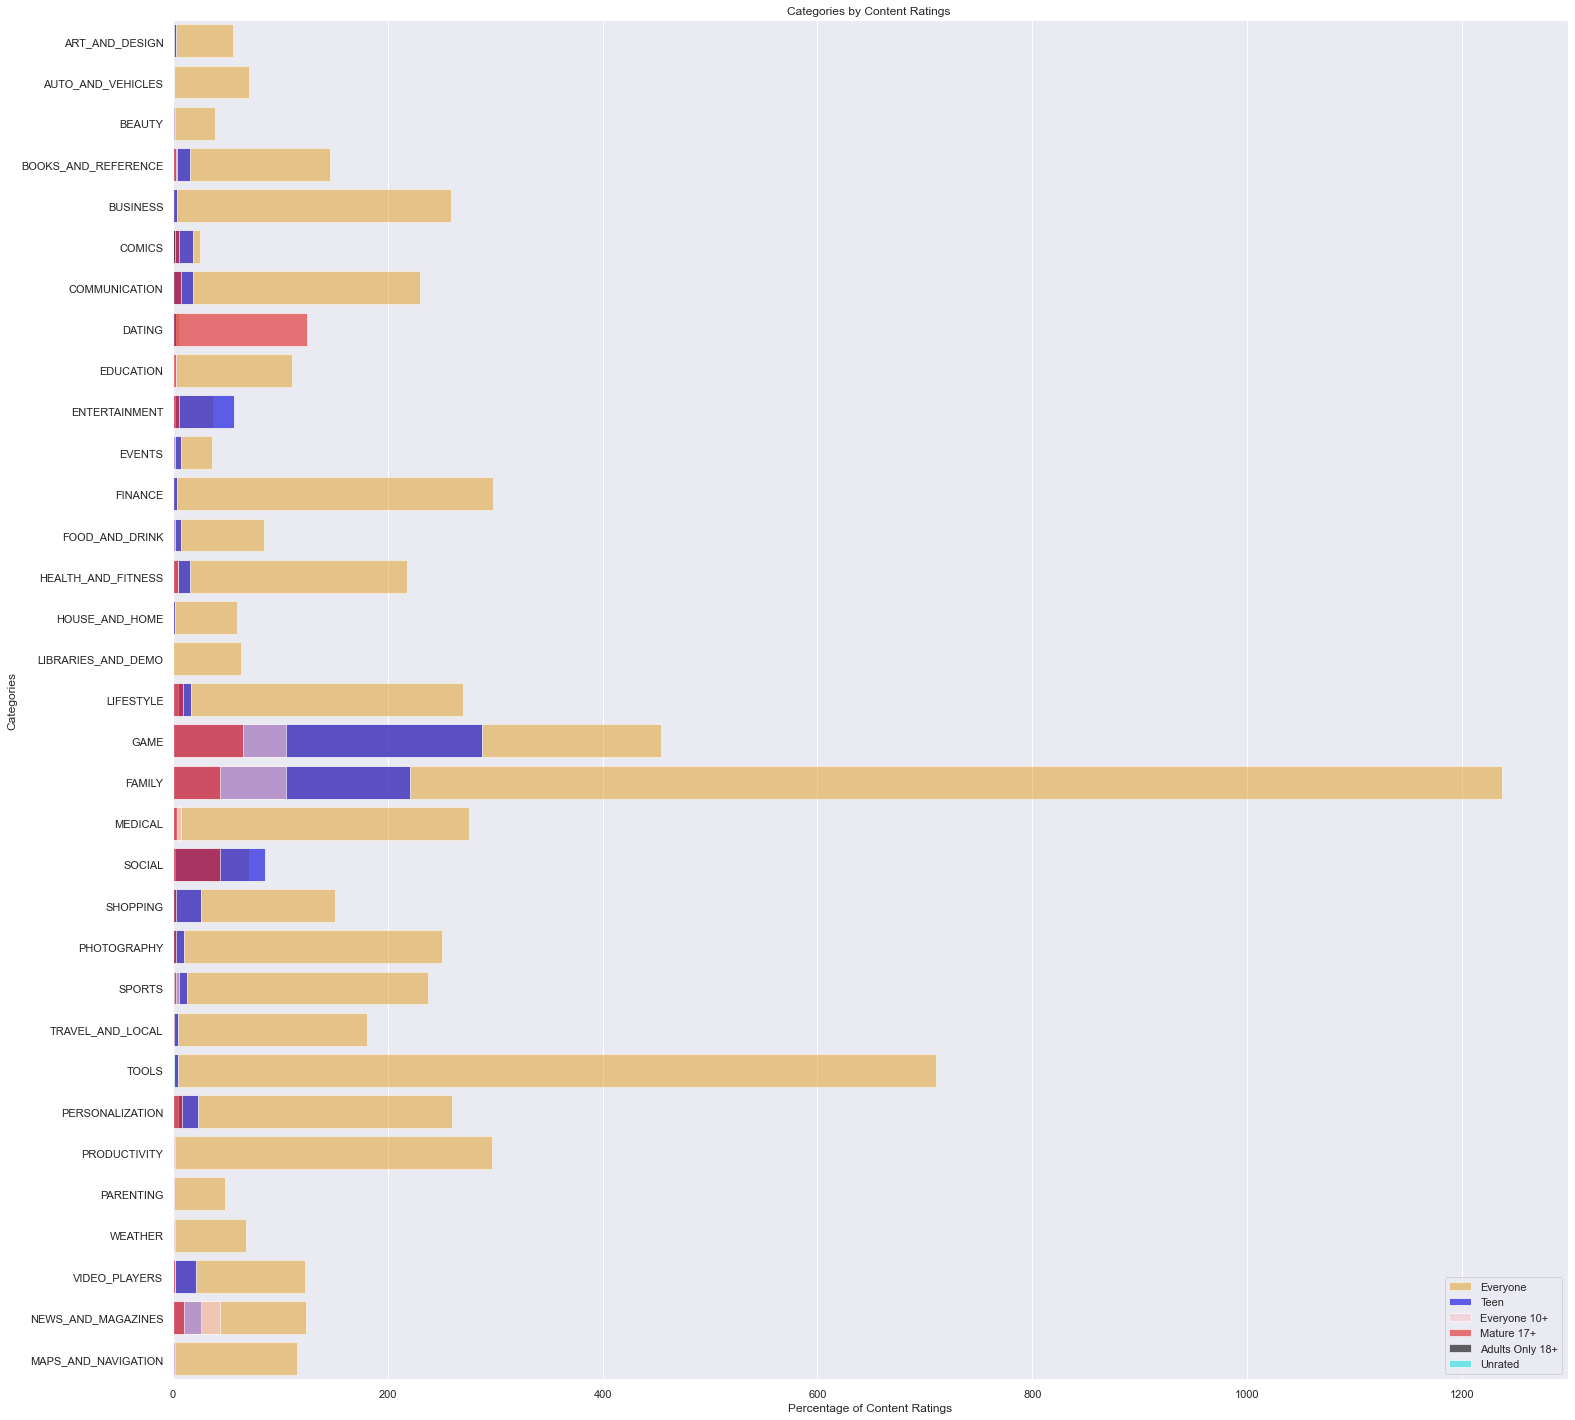

In [22]:
f,ax = plt.subplots(figsize = (25,25))
sns.barplot(x=everyone,y=cat_list,color='Orange',alpha = 0.5,label='Everyone')
sns.barplot(x=teen,y=cat_list,color='blue',alpha = 0.7,label='Teen')
sns.barplot(x=everyone_10,y=cat_list,color='pink',alpha = 0.6,label='Everyone 10+')
sns.barplot(x=mature_17,y=cat_list,color='red',alpha = 0.6,label='Mature 17+')
sns.barplot(x=adults_only_18,y=cat_list,color='black',alpha = 0.6,label='Adults Only 18+')
sns.barplot(x=unrated,y=cat_list,color='aqua',alpha = 0.6,label='Unrated')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Content Ratings', ylabel='Categories',title = "Categories by Content Ratings ")

In [23]:
df['Category'] = df.index

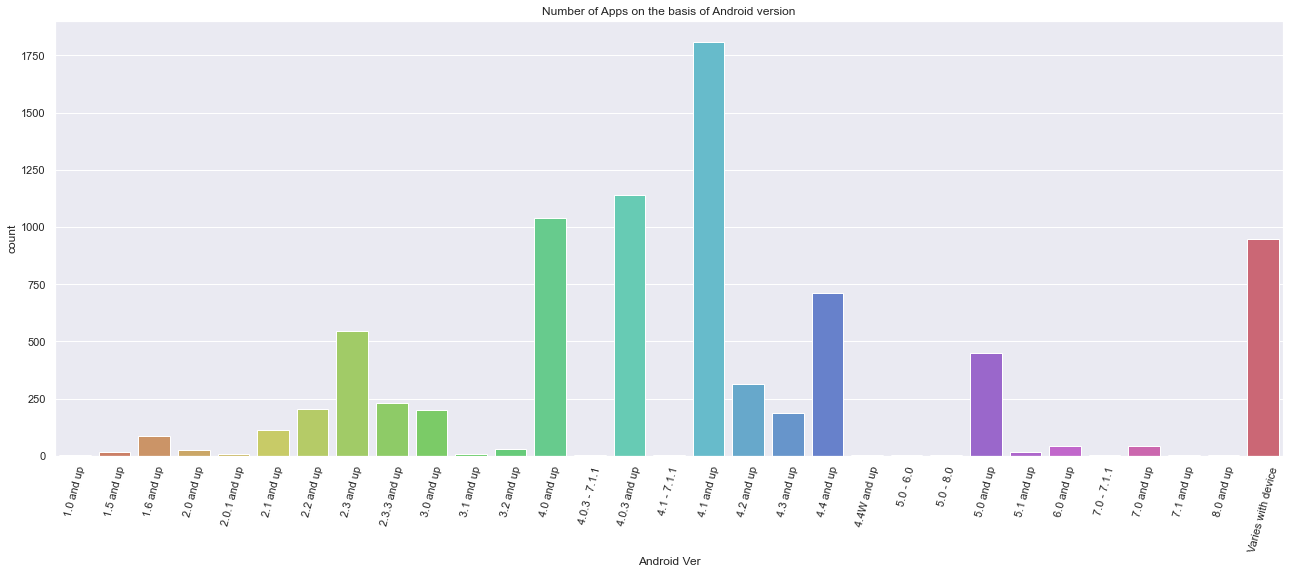

In [24]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Android version')
sns.countplot(x='Android Ver',data = df.sort_values(by = 'Android Ver'),palette='hls')
plt.xticks(rotation = 75)

plt.show()

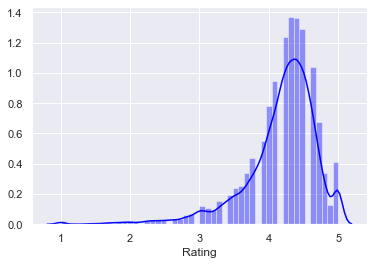

The skewness of this distribution is -1.7443331394643597
The Median of this distribution 4.3 is greater than mean 4.173321123321126 of this distribution


In [25]:
sns.distplot(df['Rating'], color ='blue')
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()))

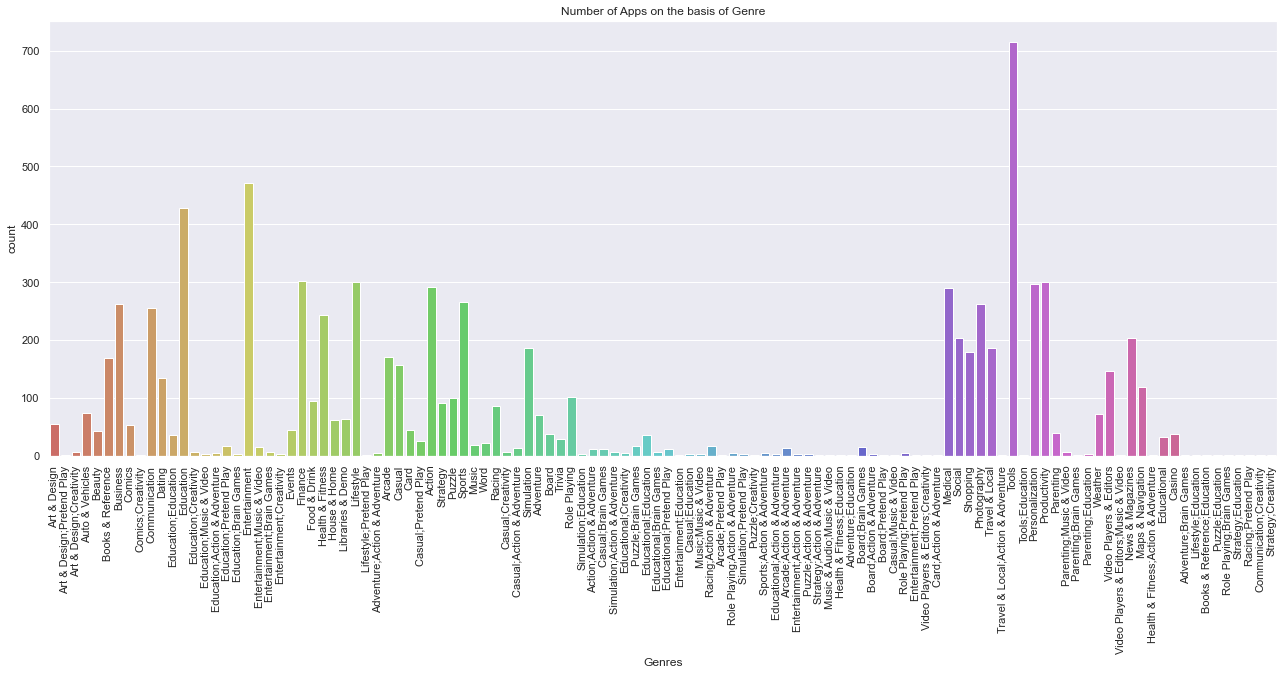

In [26]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Genre')
sns.countplot(x='Genres',data = df,palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [27]:
type(df['Reviews'][0])

numpy.int64

In [28]:
df['Reviews'] = df['Reviews'].map(lambda x: int(x))

In [29]:
df['Reviews'].describe()

count    8.190000e+03
mean     2.554354e+05
std      1.986309e+06
min      1.000000e+00
25%      1.260000e+02
50%      3.009500e+03
75%      4.391425e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [30]:
df[df['Reviews']>20000000]['App']

335              Messenger – Text and Video Chat for Free
336                                    WhatsApp Messenger
1654                                       Subway Surfers
1655                                     Candy Crush Saga
1660                                         Clash Royale
1670                                       Clash of Clans
2544                                             Facebook
2545                                            Instagram
3665                                              YouTube
4005              Clean Master- Space Cleaner & Antivirus
7536    Security Master - Antivirus, VPN, AppLock, Boo...
Name: App, dtype: object

In [31]:
df.loc[df[['Reviews']].idxmax()]

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,4.1,Facebook,2544,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,03-Aug-18,Varies with device,Varies with device


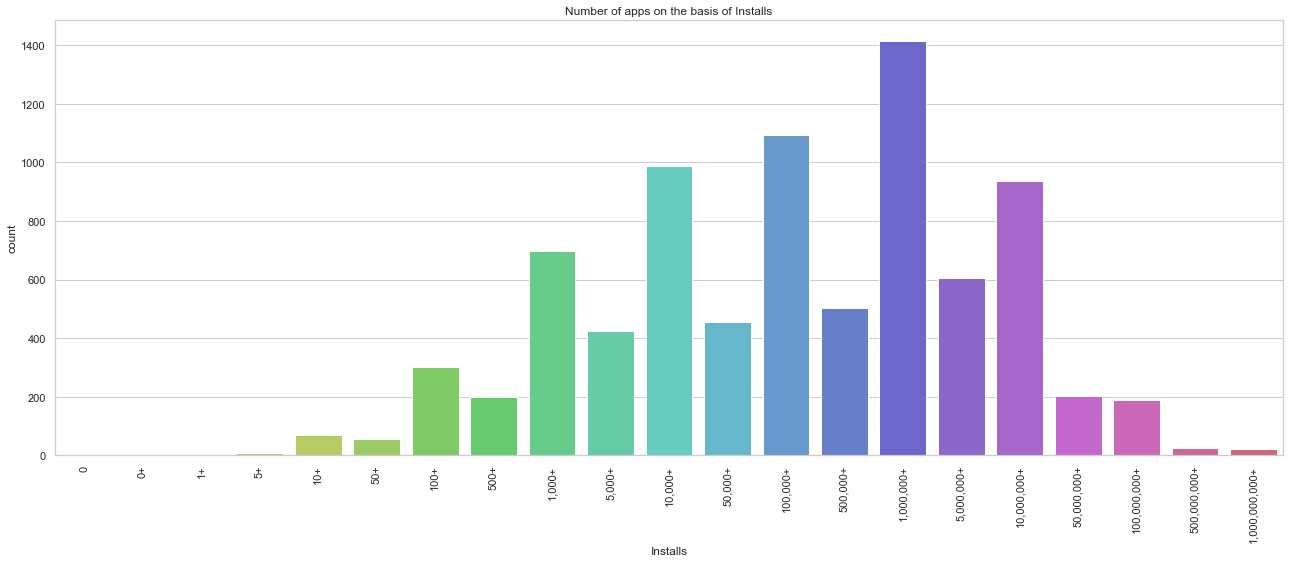

In [32]:
order = ['0','0+','1+','5+','10+','50+','100+','500+','1,000+','5,000+','10,000+','50,000+','100,000+','500,000+','1,000,000+',
         '5,000,000+','10,000,000+',
         '50,000,000+','100,000,000+','500,000,000+','1,000,000,000+']
sns.set_style('whitegrid')
plt.figure(figsize=(22,8))
plt.title('Number of apps on the basis of Installs')
sns.countplot(x='Installs',data = df,palette='hls',order = order)
plt.xticks(rotation = 90)

plt.show()

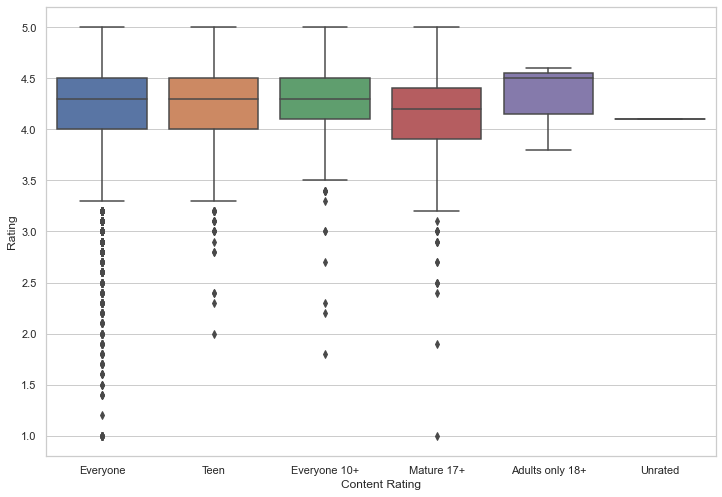

In [33]:
plt.figure(figsize=(12,8.27))
sns.boxplot(df['Content Rating'],df.Rating)

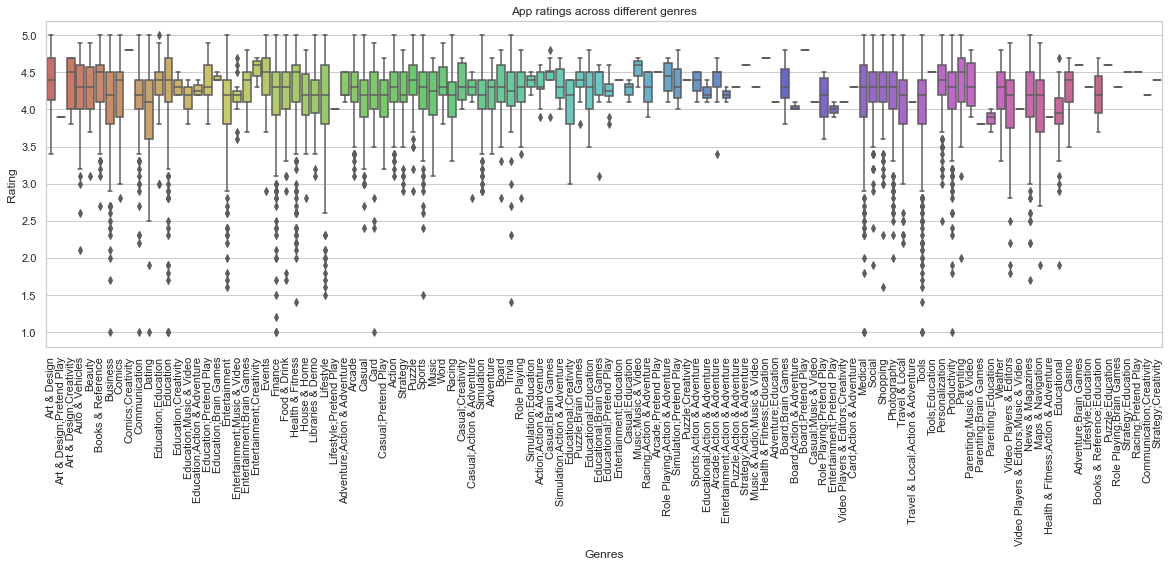

In [34]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Genres',y='Rating',data = df,palette='hls')
plt.xticks(rotation=90)
plt.title('App ratings across different genres')
plt.show()

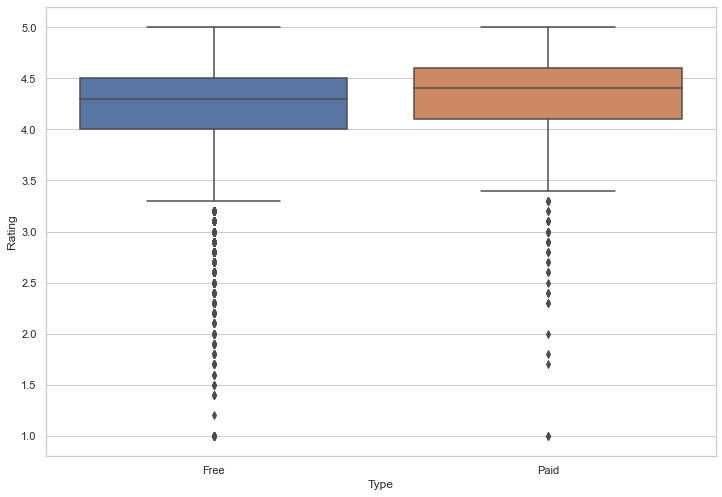

In [35]:
plt.figure(figsize=(12,8.27))
sns.boxplot(df['Type'],df.Rating)

In [36]:
col = df['Category'] == "Dating"
df[col]

C:\Users\lakye\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


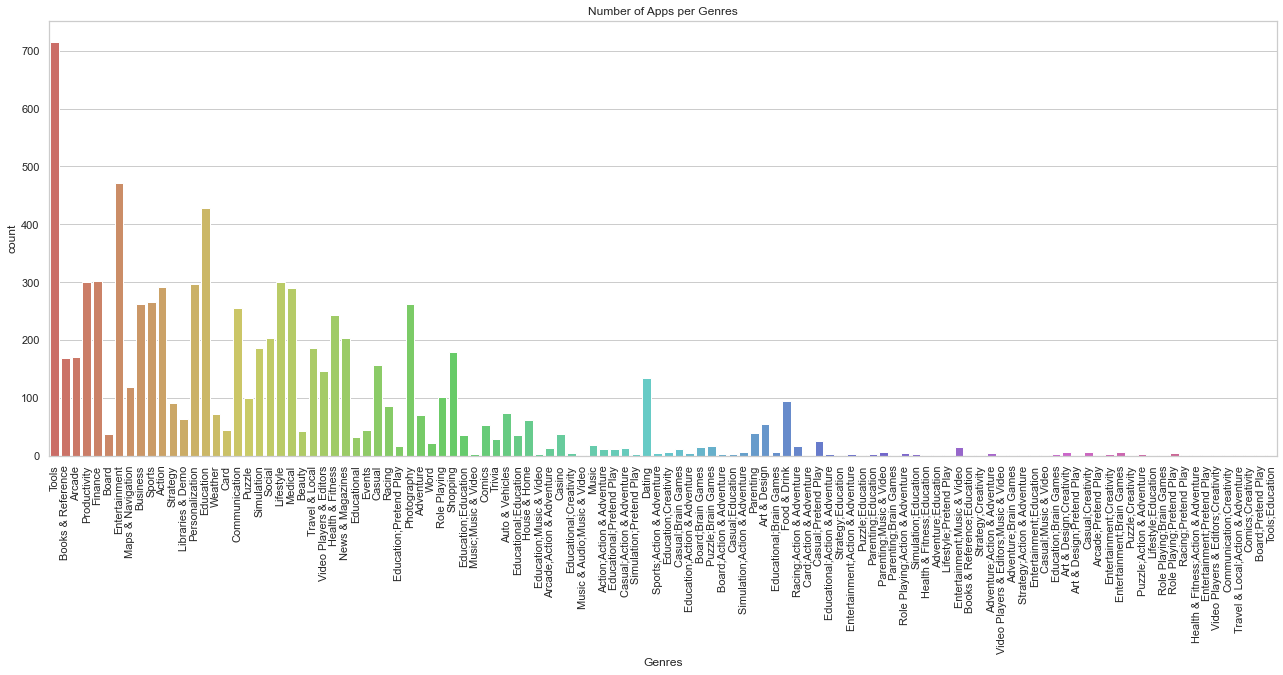

In [37]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps per Genres')
sns.countplot(x='Genres',data = df.sort_values(by = 'Android Ver'),palette='hls')
plt.xticks(rotation = 90)

plt.show()